In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LogisticRegression

# 데이터 준비

In [5]:
df = pd.read_csv('C:/Users/USER/Desktop/Deep_Learning/abalone.csv')
df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [8]:
# Rings Drop 1
# X = df.drop('Rings', axis=1)
# X.head()


# Rings Drop 2
X = df.iloc[:,1:-1].values # 모든 행(:) 과 두 번째 열부터 마지막 전 열까지(1:-1) 선택
y = df.iloc[:,-1].values # 모든 행(:)과 마지막 열(-1) 선택

In [9]:
y=df['Rings']
y.value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

In [17]:
print(X)

[['M' 0.455 0.365 ... 0.2245 0.101 0.15]
 ['M' 0.35 0.265 ... 0.0995 0.0485 0.07]
 ['F' 0.53 0.42 ... 0.2565 0.1415 0.21]
 ...
 ['M' 0.6 0.475 ... 0.5255 0.2875 0.308]
 ['F' 0.625 0.485 ... 0.531 0.261 0.296]
 ['M' 0.71 0.555 ... 0.9455 0.3765 0.495]]


In [18]:
print(y)

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64


In [20]:
# index 'Sex' 인코딩
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
x=np.array(ct.fit_transform(X))
print(X)

[['M' 0.455 0.365 ... 0.2245 0.101 0.15]
 ['M' 0.35 0.265 ... 0.0995 0.0485 0.07]
 ['F' 0.53 0.42 ... 0.2565 0.1415 0.21]
 ...
 ['M' 0.6 0.475 ... 0.5255 0.2875 0.308]
 ['F' 0.625 0.485 ... 0.531 0.261 0.296]
 ['M' 0.71 0.555 ... 0.9455 0.3765 0.495]]


In [22]:
print(x.shape)

(4177, 10)


# 훈련, 테스트 세트 분할

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle=True,random_state=12)

# Logistic Regression


In [24]:
lr=LogisticRegression(random_state=0,max_iter=500)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [25]:
print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, y_pred))
print (confusion_matrix(y_test, y_pred))


--- Logistic Regression Classifier ---
0.25717703349282295
[[ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  4  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  8  6  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1 22  6  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 23 19  6  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 10 30 24 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3 18 39 32 15  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  9 37 55 31  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  7 16 47 45 12  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  4  7 29 39 22  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  4 14 15 10  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  5 18 14  5  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  5 12  4  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  5 11  4  0  0  0  0

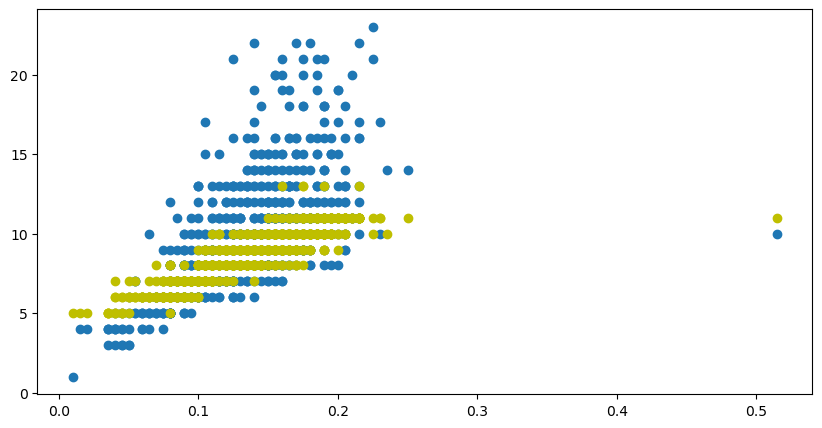

In [26]:
plt.figure(figsize=(10,5))
plt.scatter(x_test[:,5], y_test, label='y_test')
plt.scatter(x_test[:,5], y_pred, c='y', label='y_preds')
plt.show()

# Decision Tree Classification
 

In [27]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

In [28]:
print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, y_pred))
print (confusion_matrix(y_test, y_pred))


--- Decision Tree Classifier ---
0.18660287081339713
[[ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  2  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  7  5  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  6  6  9  6  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  3 14 15  7  2  2  5  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  2 16 21 19  9  6  1  1  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  1  2 21 19 23 18 15  3  2  0  0  1  0  0  0  1  0  0  0]
 [ 0  0  0  0  3  9 34 25 27 21  8  3  1  1  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  2  5 14 29 27 13  8  8  5  7  5  1  1  0  0  1  0  1]
 [ 0  0  0  0  1  1  8 21 21 22 10  5  5  2  3  1  0  0  0  0  0  1]
 [ 0  0  0  0  1  1  4  7 11  8  4  3  0  1  1  4  1  0  1  0  0  0]
 [ 0  0  0  0  0  1  4  3  9  9  4  2  4  1  1  1  1  1  1  0  0  2]
 [ 0  0  0  0  0  0  1  6  3  3  2  1  0  1  3  0  1  0  1  0  0  0]
 [ 0  0  0  0  0  1  1  3  2  2  3  2  3  2  1  1

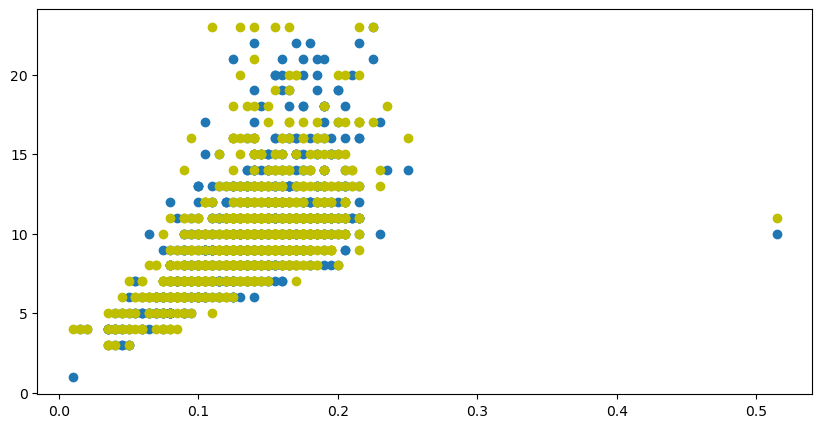

In [29]:
plt.figure(figsize=(10,5))
plt.scatter(x_test[:,5], y_test, label='y_test')
plt.scatter(x_test[:,5], y_pred, c='y', label='y_preds')
plt.show()

# Random Forest Classification

In [30]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [31]:
print ("\n--- Random Forest Classifier ---")
print (accuracy_score(y_test, y_pred))
print (confusion_matrix(y_test, y_pred))


--- Random Forest Classifier ---
0.2607655502392344
[[ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  4  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  9  4  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  6  7  9  6  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  4 16 24  4  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  4 16 21 23  7  3  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  3 17 38 30 13  3  1  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2 12 30 48 25 13  3  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  3 17 26 44 24  5  5  0  1  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  7 22 30 28 10  1  1  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  1  2  3 11 13  8  3  2  1  0  2  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  3 11  5  8  9  2  3  0  1  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  3 10  2  0  0  0  1  3  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  1  0  5  6  2  1  2  3  0  1  1 

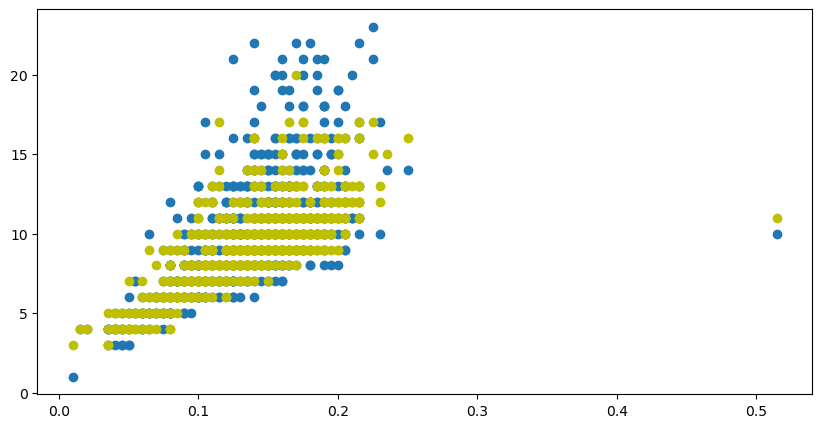

In [32]:
plt.figure(figsize=(10,5))
plt.scatter(x_test[:,5], y_test, label='y_test')
plt.scatter(x_test[:,5], y_pred, c='y', label='y_preds')
plt.show()

# SVC(Support Vector Machine Classification)


In [33]:
svc=SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)

In [34]:
print ("\n--- SVM Classifier ---")
print (accuracy_score(y_test, y_pred))
print (confusion_matrix(y_test, y_pred))


--- SVM Classifier ---
0.24880382775119617
[[ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 14  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 24  2  0  3  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 22 16  4 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 13 22 20 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4 16 34 43 10  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  3 30 68 31  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2 12 64 37 12  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  6 39 30 24  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  3 20 12  9  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  3 26  8  6  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  5 13  3  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  9  9  3  0  0  0  0  0  0  0  0  0 

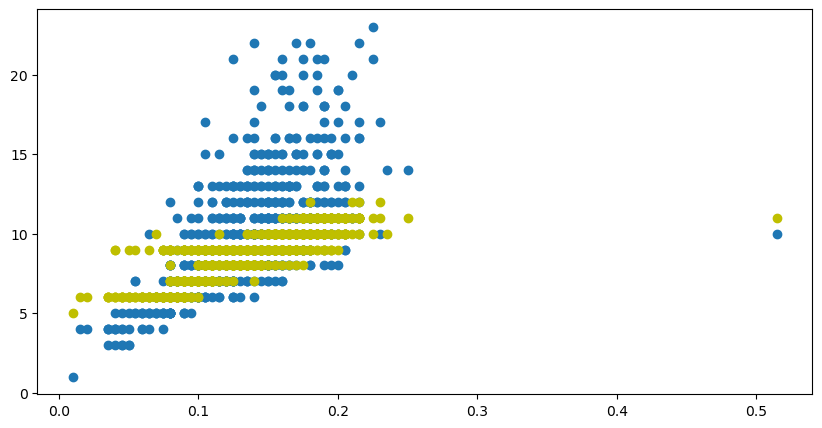

In [35]:
plt.figure(figsize=(10,5))
plt.scatter(x_test[:,5], y_test, label='y_test')
plt.scatter(x_test[:,5], y_pred, c='y', label='y_preds')
plt.show()

# KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [40]:
print ("\n--- KNN Classifier ---")
print (accuracy_score(y_test, y_pred))
print (confusion_matrix(y_test, y_pred))


--- KNN Classifier ---
0.23923444976076555
[[ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  3  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  5  5  4  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  5 12  5  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  6 22 15  2  2  1  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  3 19 25 18  7  3  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  8 15 40 31  7  2  2  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4 14 33 41 26 10  3  1  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  7 22 31 27 21  9  4  0  3  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  4 16 31 18 22  6  2  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  2  7 11 11  8  2  3  0  0  0  1  1  0  0  0  0  0]
 [ 0  0  0  0  0  2  8 10 12  5  2  1  3  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  6  7  3  0  3  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  2  6  7  3  1  0  1  1  0  0  0  0  0 

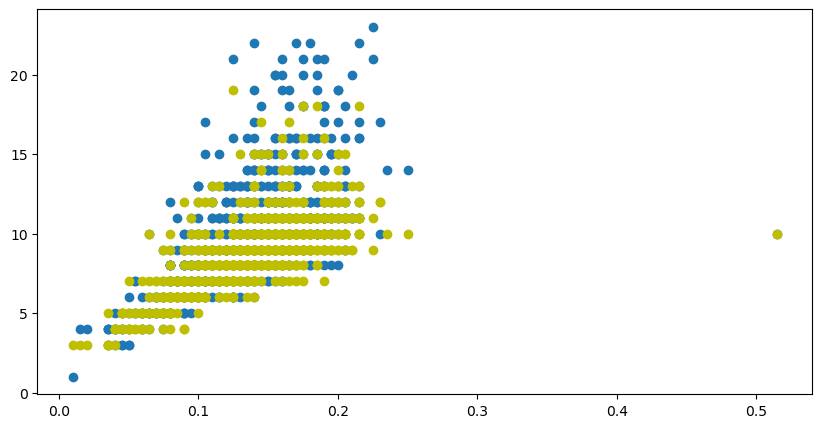

In [41]:
plt.figure(figsize=(10,5))
plt.scatter(x_test[:,5], y_test, label='y_test')
plt.scatter(x_test[:,5], y_pred, c='y', label='y_preds')
plt.show()

# DeepLearning

### Ring이 어떤 기준이 정해지지 않은 분류 데이터가 아니라 그룹화 과정(Loss 이상하게 나옴)

In [48]:
from tensorflow import keras
from tensorflow.keras import layers

# input_dim=x_train.shape[1] # 훈련 데이터의 특성 개수를 저장
# print(input_dim)
model=keras.Sequential([
    layers.Dense(12, activation="relu", input_shape=(input_dim,)),
    layers.Dense(12,activation="relu"),
    layers.Dense(12,activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 12)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 12)             │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 12)             │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 457 (1.79 KB)

 Trainable params: 457 (1.79 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [50]:
x_train=np.asarray(x_train).astype(np.float32)
y_train=np.asarray(y_train).astype(np.float32)
x_test=np.asarray(x_test).astype(np.float32)
y_test=np.asarray(y_test).astype(np.float32)

In [51]:
history=model.fit(x_train,y_train,epochs=30,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0000e+00 - loss: -2.6959 - val_accuracy: 0.0012 - val_loss: -43.0252
Epoch 2/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: -114.3050 - val_accuracy: 0.0012 - val_loss: -642.5449
Epoch 3/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: -1216.6580 - val_accuracy: 0.0012 - val_loss: -4372.4312
Epoch 4/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: -6740.2534 - val_accuracy: 0.0012 - val_loss: -16381.7295
Epoch 5/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: -21961.6387 - val_accuracy: 0.0012 - val_loss: -43655.2539
Epoch 6/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: -54879.8125 - val_accuracy: 0.0012 - val_loss: -94572.3672
Epoch 7/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: -115820.1484 - val_accuracy: 0.0012 - val_loss: -178250.4531
Epoch 8/30
105/105

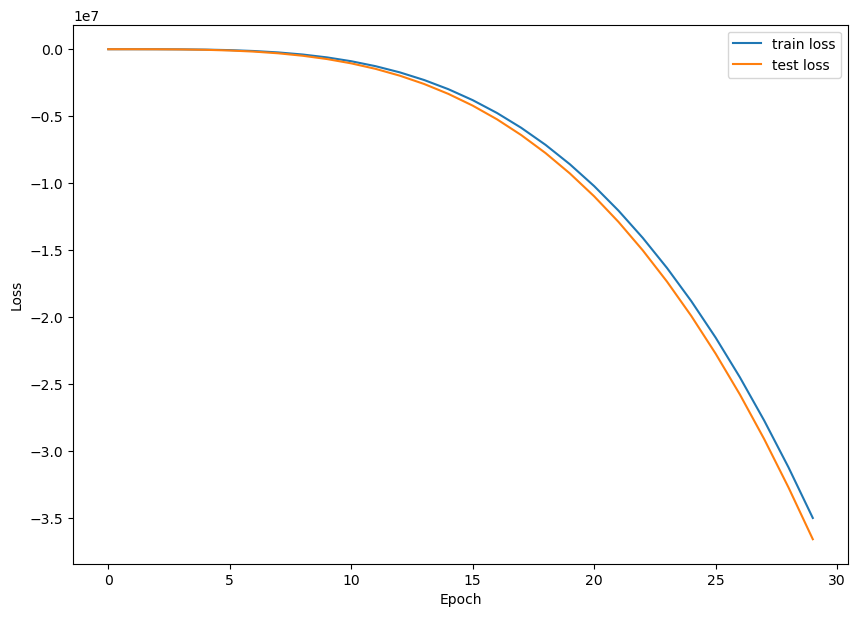

In [52]:
plt.figure(figsize=(10,7))
plt.plot(range(30), history.history['loss'], label='train loss')
plt.plot(range(30), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [53]:
model.evaluate(x_test, y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0016 - loss: -36462704.0000     


[-36581484.0, 0.0011961722047999501]